# owid_co2_data

### Author: Joe Muscolino
#### Updated: 10/11/2023

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib import rcParams
import matplotlib.pyplot as plt
import random
from datetime import datetime

# A. Data Exploration and Cleaning

In [2]:
co2_df = pd.read_csv("owid-co2-data.csv")

In [3]:
co2_df.shape

(50598, 79)

In [31]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 60 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [4]:
# Get Percent of missing data in each column, convert the missing_data from a 
# decimal to a percentage and round to 2 decimal places.
missing_data = round(co2_df.isna().sum() / len(co2_df) * 100, 2)
missing_data

country 0.00
year 0.00
iso_code 16.71
population 20.93
gdp 71.22
 ... 
temperature_change_from_n2o 25.65
total_ghg 87.85
total_ghg_excluding_lucf 87.85
trade_co2 91.58
trade_co2_share 91.58
Length: 79, dtype: float64

In [5]:

# Parse index of previous missing_data and check how much data is missing from column, if 98% or more is missing, drop it. 
for col in missing_data.index:
    if missing_data[col] >= 85:
        co2_df.drop(columns=[col], inplace=True)

co2_df.shape

(50598, 60)

In [7]:
co2_df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
count,50598.000000,4.000800e+04,1.456400e+04,24974.000000,22714.000000,31349.000000,28944.000000,25032.000000,24218.000000,23917.000000,...,23421.000000,15980.000000,21990.000000,39388.000000,23421.000000,41724.000000,37620.000000,41724.000000,41724.000000,37620.000000
mean,1925.365173,5.926810e+07,2.677586e+11,8.392491,0.063958,380.237549,5.716527,20.492413,499.312724,7.204133,...,3.344629,2.085217,2.827082,2.561769,3.328371,2.190116,0.002956,0.006886,0.010069,0.000497
std,59.882945,3.222866e+08,2.103151e+12,63.009433,0.123023,1801.527942,58.764604,699.580857,2081.497921,92.866497,...,13.024224,9.106761,13.721541,10.092255,12.828399,9.008552,0.016073,0.039684,0.057186,0.002943
min,1750.000000,2.100000e+01,4.998000e+07,0.000000,0.000000,0.000000,-1818.472000,-100.000000,-187.032000,-2317.996000,...,0.000000,0.000000,0.000000,-6.498000,0.000000,-0.899000,-0.001000,0.000000,-0.001000,0.000000
25%,1882.000000,3.198618e+05,7.516679e+09,0.000000,0.000000,0.125000,0.000000,-0.541500,4.646000,-0.572000,...,0.004000,0.000000,0.000000,0.001000,0.005000,0.003000,0.000000,0.000000,0.000000,0.000000
50%,1929.000000,2.323117e+06,2.597999e+10,0.010000,0.005000,3.109000,0.015000,3.783500,24.417000,0.062000,...,0.053000,0.000000,0.000000,0.072000,0.061000,0.071000,0.000000,0.000000,0.000000,0.000000
75%,1975.000000,9.802751e+06,1.132942e+11,0.692000,0.087000,43.730000,0.773000,10.569000,113.381250,2.325000,...,0.493000,0.051000,0.123000,0.485000,0.518000,0.329000,0.001000,0.001000,0.001000,0.000000
max,2021.000000,7.909295e+09,1.136302e+14,1672.592000,2.574000,37123.852000,1859.764000,102318.508000,41639.840000,2246.723000,...,100.000000,100.000000,100.000000,100.675000,100.000000,100.000000,0.415000,1.113000,1.611000,0.083000


# B. Data Analysis

### Analyze data by Year

In [8]:
population_data = co2_df.dropna(subset=['population'])
population_by_year = population_data.groupby("year").aggregate({"population":"sum", "co2":"sum", })
population_by_year

,population,co2
year,,
1750,2.252271e+09,37.404
1760,2.355539e+09,40.068
1770,2.472947e+09,49.096
1780,2.690228e+09,60.220
1790,2.813271e+09,76.710
...,...,...
2017,3.080957e+10,143808.278
2018,3.114641e+10,146532.830
2019,3.147256e+10,147477.381


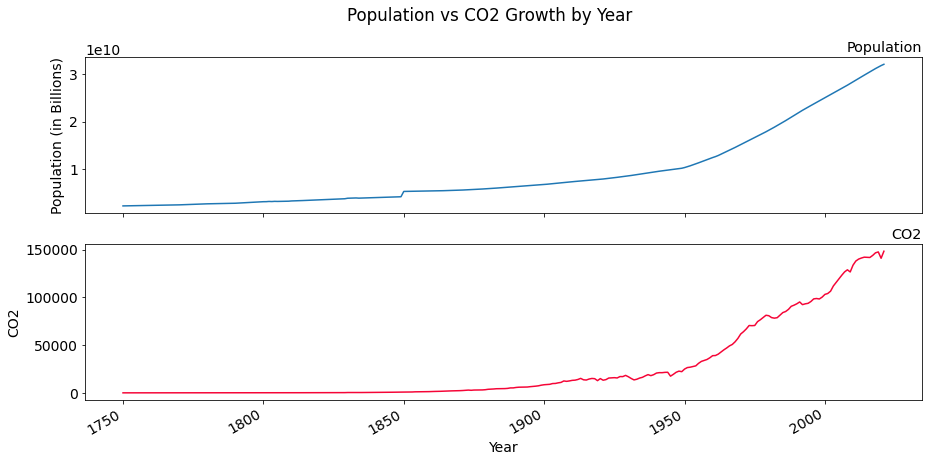

In [57]:
# # Missions Timeline
# count_ms_month = temp["MSNMONTH"].value_counts().sort_index(ascending=True)

fig, axs = plt.subplots(2, sharex=True, figsize=(15, 7))
fig.suptitle('Population vs CO2 Growth by Year')

# Plot Data
plt.rcParams.update({'font.size': 12})

axs[0].plot(population_by_year.index.to_list(), population_by_year["population"])
axs[1].plot(population_by_year.index.to_list(), population_by_year["co2"], color="#F50537")

# Set plot title
axs[0].set_title('Population', loc='right')
axs[1].set_title('CO2', loc='right')

# Set axis labels
axs[0].set_ylabel('Population (in Billions)')
axs[1].set_ylabel('CO2')
axs[1].set_xlabel('Year')
# plt.xlabel('Year')
# plt.ylabel('Population (in Billions)')

# plt.plot(population_by_year["population"], linewidth ='2.0')
# plt.plot(population_by_year["co2"], linewidth ='2.0')
plt.gcf().autofmt_xdate()
plt.show()

## USA vs China

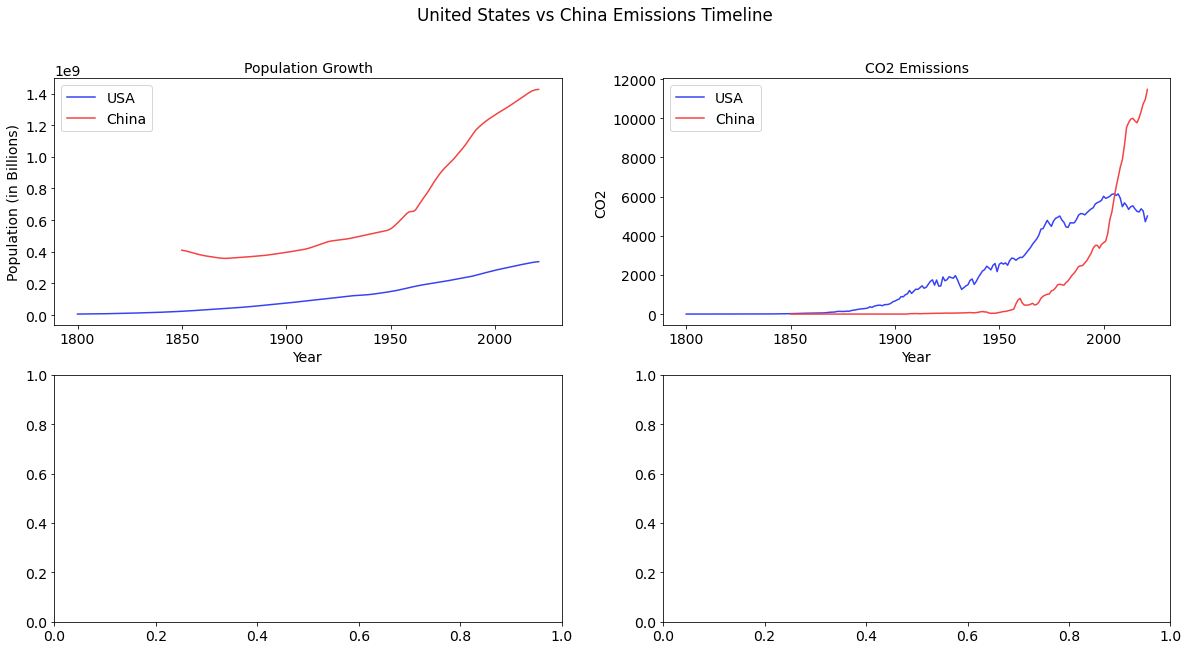

In [56]:
country_totals = co2_df.groupby(["country", "year"]).aggregate({"population":"sum", "co2":"sum", "gdp":"sum"})
usa_co2 = country_totals.loc["United States"]
china_co2 = country_totals.loc["China"]


# Plot Data
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('United States vs China Emissions Timeline')

# Population comparison
axs[0,0].plot(usa_co2.index.to_list(), usa_co2["population"], color="#3842f5")
axs[0,0].plot(china_co2.index.to_list(), china_co2["population"], color="#f54242")

# Co2 comparison
axs[0,1].plot(usa_co2.index.to_list(), usa_co2["co2"], color="#3842f5")
axs[0,1].plot(china_co2.index.to_list(), china_co2["co2"], color="#f54242")

# Set plot title
axs[0,0].set_title('Population Growth',fontsize='medium')
axs[0,1].set_title('CO2 Emissions',fontsize='medium')

# Set legend
axs[0,0].legend(["USA", "China"])
axs[0,1].legend(["USA", "China"])

# Set axis labels
axs[0,0].set_ylabel('Population (in Billions)')
axs[0,1].set_ylabel('CO2')
axs[0,0].set_xlabel('Year')
axs[0,1].set_xlabel('Year')

plt.show()